In [3]:
from typing import Any

import numpy as np
import matplotlib.pyplot as plt

import eqm_finder

In [19]:
def plot_reduced_free_energy_vs_lambda_r_constant_twist(lambda_r_array, psi_0, v_swell, zeta, plot_kwargs = {}):
    """Plots reduced free energy against lambda_r for some given range of lambda_r values.
    In the case of constant twist, the reduced free energy is equal to the free energy density."""

    free_energy_array = np.zeros(len(lambda_r_array))
    
    for i, lambda_r in enumerate(lambda_r_array):
        free_energy_array[i] = eqm_finder.calc_reduced_free_energy_density(psi_0, lambda_r, v_swell, zeta)

    plt.plot(lambda_r_array, free_energy_array, **plot_kwargs)
    plt.xlabel("$\\lambda_r$")
    plt.ylabel("$F$")

def plot_reduced_free_energy_vs_swell_anisotropy_constant_twist(lambda_r, psi_0, v_swell, zeta, plot_kwargs):
    """Plots reduced free energy against swell anisotropy = lambda_r/lambda_z for some given range of lambda_r values.
    In the case of constant twist, the reduced free energy is equal to the free energy density."""

    free_energy_array = eqm_finder.calc_reduced_free_energy_density(psi_0, lambda_r, v_swell, zeta)

    lambda_z = v_swell / lambda_r**2

    plt.plot(lambda_r / lambda_z, free_energy_array, **plot_kwargs)
    plt.xlabel("$\\lambda_r / \\lambda_z$")
    plt.ylabel("$F$")

def plot_reduced_free_energy_vs_strain_ratio_constant_twist(lambda_r, psi_0, v_swell, zeta, plot_kwargs):
    """Plots reduced free energy against swell anisotropy = lambda_r/lambda_z for some given range of lambda_r values.
    In the case of constant twist, the reduced free energy is equal to the free energy density."""

    free_energy_array = eqm_finder.calc_reduced_free_energy_density(psi_0, lambda_r, v_swell, zeta)

    lambda_z = v_swell / lambda_r**2

    strain_ratio = (lambda_r - 1) / (lambda_z - 1)

    # sort strain_ratio and free_energy array
    #indices = list(range(len(strain_ratio)))
    #indices.sort(key=strain_ratio.__getitem__)

    #sorted_strain_ratios = list(map(strain_ratio.__getitem__, indices))
    #sorted_free_energy_array = list(map(free_energy_array.__getitem__, indices))

    # mask
    free_energy_masked = np.ma.masked_where(strain_ratio[1:] - strain_ratio[:-1] > 10, free_energy_array[1:])

    plt.plot(strain_ratio[1:], free_energy_masked, **plot_kwargs)
    plt.xlabel("$\\varepsilon_r / \\varepsilon_z$")
    plt.ylabel("$F$")

# First look

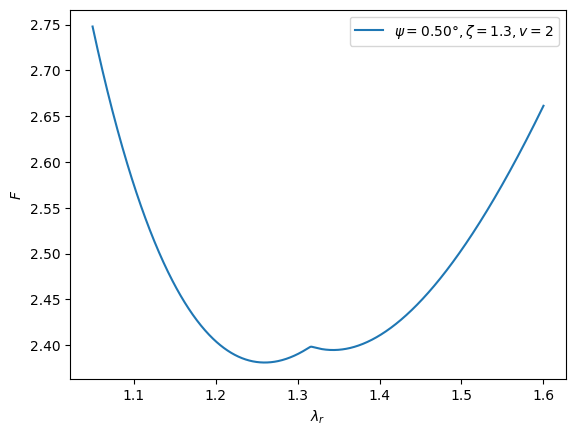

In [5]:
lambda_r_array_close = np.linspace(1.05, 1.6, 1000)
psi_0 = 0.5 * np.pi / 180
v_swell = 2
zeta = 1.3

plot_reduced_free_energy_vs_lambda_r_constant_twist(lambda_r_array_close, psi_0, v_swell, zeta,
                                                    {"label": f"$\\psi = {psi_0 * 180/np.pi:.02f}\\degree, \\zeta = {zeta}, v = {v_swell}$"})

plt.legend(loc='best')
plt.show()

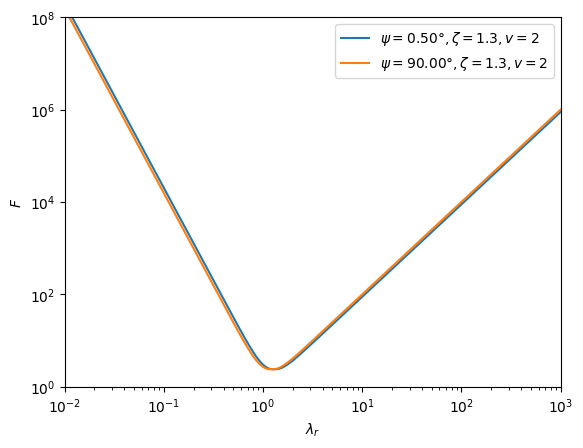

In [6]:
lambda_r_array_far = np.logspace(-2, 3, 1000, base=10)
psi_0 = 0.5 * np.pi / 180
v_swell = 2
zeta = 1.3

plot_reduced_free_energy_vs_lambda_r_constant_twist(lambda_r_array_far, psi_0, v_swell, zeta,
                                                    {"label": f"$\\psi = {psi_0 * 180/np.pi:.02f}\\degree, \\zeta = {zeta}, v = {v_swell}$"})

psi_0 = 90 * np.pi / 180

plot_reduced_free_energy_vs_lambda_r_constant_twist(lambda_r_array_far, psi_0, v_swell, zeta,
                                                    {"label": f"$\\psi = {psi_0 * 180/np.pi:.02f}\\degree, \\zeta = {zeta}, v = {v_swell}$"})

plt.legend(loc='best')

plt.xlim(1e-2, 1e3)
plt.ylim(1e0, 1e8)

plt.xscale('log')
plt.yscale('log')
plt.show()

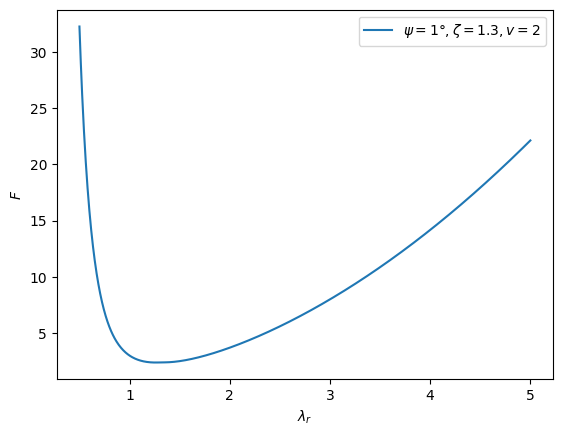

In [7]:
plot_reduced_free_energy_vs_lambda_r_constant_twist(np.linspace(0.5, 5.0, 1000), 1 * np.pi / 180, 2, 1.3, {"label": "$\\psi = 1\\degree, \\zeta = 1.3, v = 2$"})

plt.legend(loc='best')
plt.show()

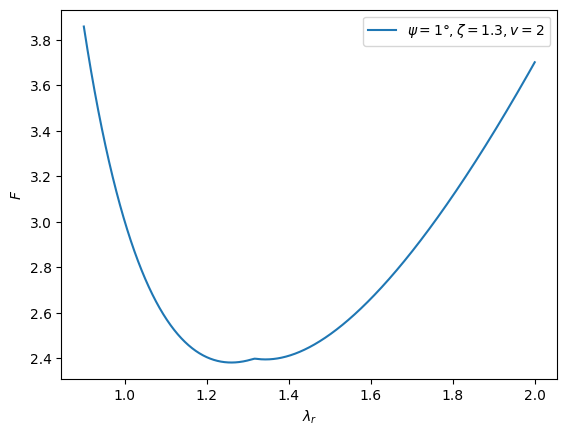

In [8]:
plot_reduced_free_energy_vs_lambda_r_constant_twist(np.linspace(0.9, 2, 1000), 1 * np.pi / 180, 2, 1.3, {"label": "$\\psi = 1\\degree, \\zeta = 1.3, v = 2$"})

plt.legend(loc='best')
plt.show()

# Vary Parameters
## Vary zeta

In [9]:
def plot_reduced_free_energy_vs_lambda_r_vary_zeta(lambda_r_array, psi_0, v_swell, zeta_array):
    for zeta in zeta_array:
        plot_reduced_free_energy_vs_lambda_r_constant_twist(lambda_r_array, psi_0, v_swell, zeta, {"label": f"$\\zeta = {zeta:.01f}$"})

    plt.legend(loc='best')
    plt.title(f"$\\psi_0 = {psi_0 * 180 / np.pi:.01f}\\degree, v = {v_swell}$")

def plot_reduced_free_energy_vs_swell_anisotropy_vary_zeta(lambda_r_array, psi_0, v_swell, zeta_array):
    for zeta in zeta_array:
        plot_reduced_free_energy_vs_swell_anisotropy_constant_twist(lambda_r_array, psi_0, v_swell, zeta, {"label": f"$\\zeta = {zeta:.01f}$"})

    plt.legend(loc='best')
    plt.title(f"$\\psi_0 = {psi_0 * 180 / np.pi:.01f}\\degree, v = {v_swell}$")

def plot_reduced_free_energy_vs_strain_ratio_vary_zeta(lambda_r_array, psi_0, v_swell, zeta_array):
    for zeta in zeta_array:
        plot_reduced_free_energy_vs_strain_ratio_constant_twist(lambda_r_array, psi_0, v_swell, zeta, {"label": f"$\\zeta = {zeta:.01f}$"})

    plt.legend(loc='best')
    plt.title(f"$\\psi_0 = {psi_0 * 180 / np.pi:.01f}\\degree, v = {v_swell}$")

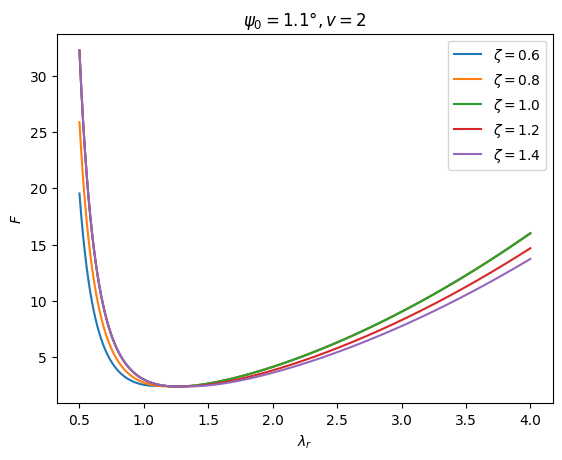

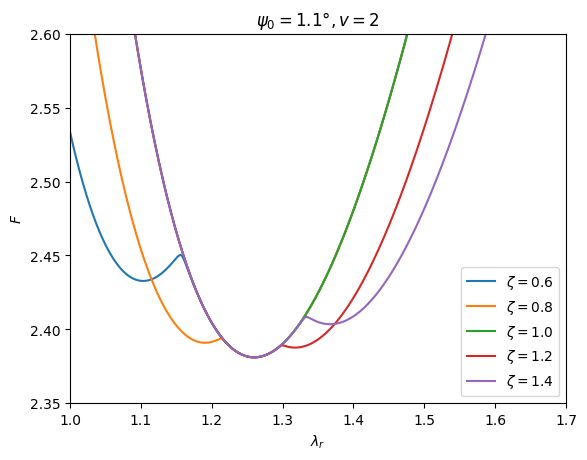

In [10]:
lambda_r_array_wide = np.linspace(0.5, 4, 1000)
lambda_r_array_close = np.linspace(0.8, 1.6, 1000)

ONE = 1 + 1e-10

zeta_list = [0.6, 0.8, ONE, 1.2, 1.4]

plot_reduced_free_energy_vs_lambda_r_vary_zeta(lambda_r_array_wide, 0.02, 2, zeta_list)
plt.show()

plot_reduced_free_energy_vs_lambda_r_vary_zeta(lambda_r_array_close, 0.02, 2, zeta_list)
plt.xlim(1,1.7)
plt.ylim(2.35,2.6)
plt.show()

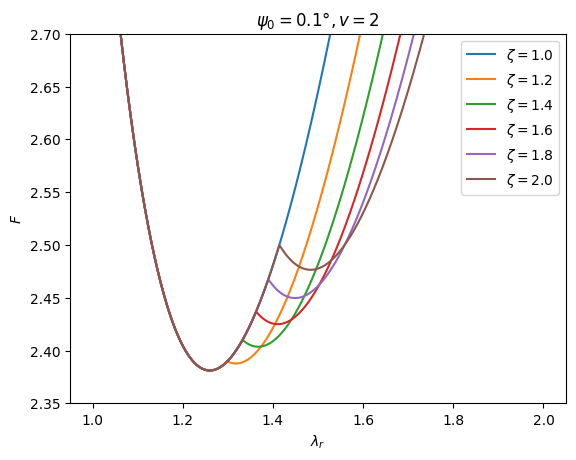

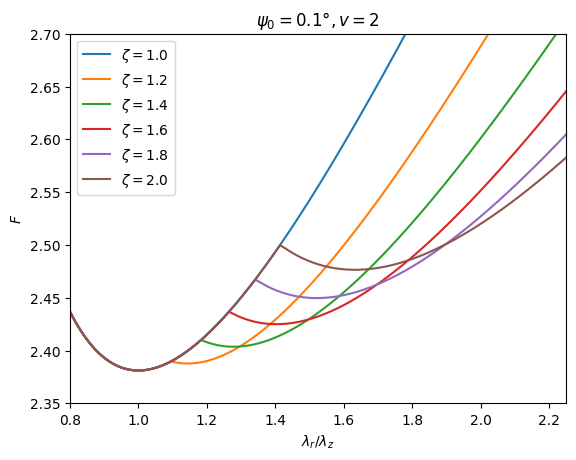

In [11]:
plot_reduced_free_energy_vs_lambda_r_vary_zeta(np.linspace(1, 2, 1000), 0.1 * np.pi / 180, 2, [ONE, 1.2, 1.4, 1.6, 1.8, 2])
#plt.xlim(1,1.7)
plt.ylim(2.35,2.7)
plt.show()

plot_reduced_free_energy_vs_swell_anisotropy_vary_zeta(np.linspace(1, 2, 1000), 0.1 * np.pi / 180, 2, [ONE, 1.2, 1.4, 1.6, 1.8, 2])
plt.xlim(0.8, 2.25)
plt.ylim(2.35,2.7)

plt.show()

(2.2, 3.0)

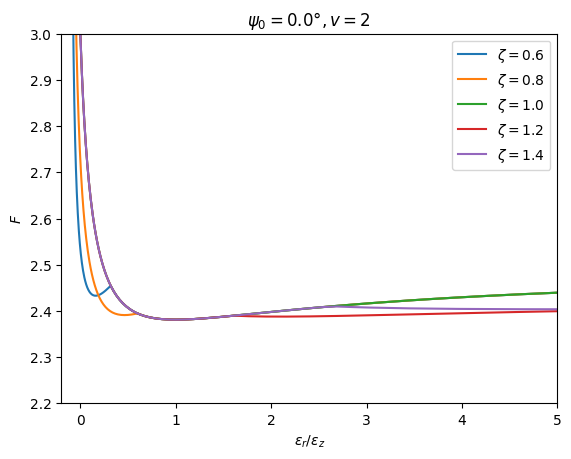

In [150]:
plot_reduced_free_energy_vs_strain_ratio_vary_zeta(lambda_r_array_wide, 0.001 * np.pi / 180, 2, zeta_list)

plt.xlim(-0.2,5)
plt.ylim(2.2,3)

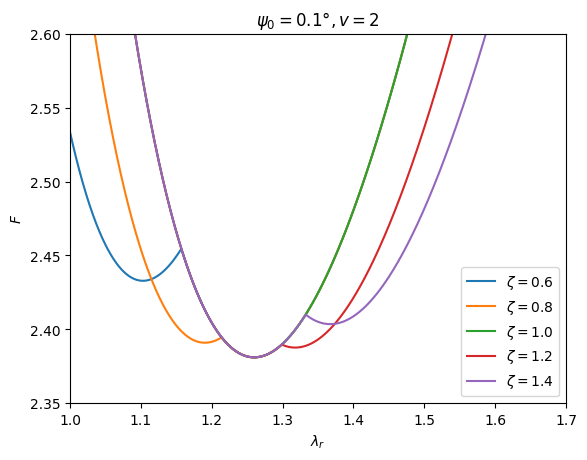

In [13]:
zeta_list = [0.6, 0.8, ONE, 1.2, 1.4]

psi_0 = 0.1 * np.pi / 180

plot_reduced_free_energy_vs_lambda_r_vary_zeta(lambda_r_array_close, psi_0, 2, zeta_list)
plt.xlim(1,1.7)
plt.ylim(2.35,2.6)
plt.show()

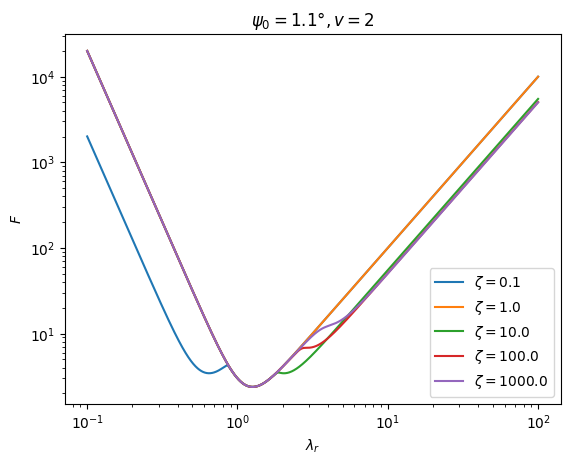

In [14]:
plot_reduced_free_energy_vs_lambda_r_vary_zeta(np.logspace(-1, 2, 1000, base=10), 0.02, 2, [0.1, ONE, 10, 100, 1000])
#plt.xlim(1,1.7)
#plt.ylim(2.35,2.7)

plt.xscale('log')
plt.yscale('log')

plt.show()

The low-lambda r power law is highly independent of zeta (provided zeta > 1?)
The high-lambda r power-law has a constant prefactor in large-zeta.

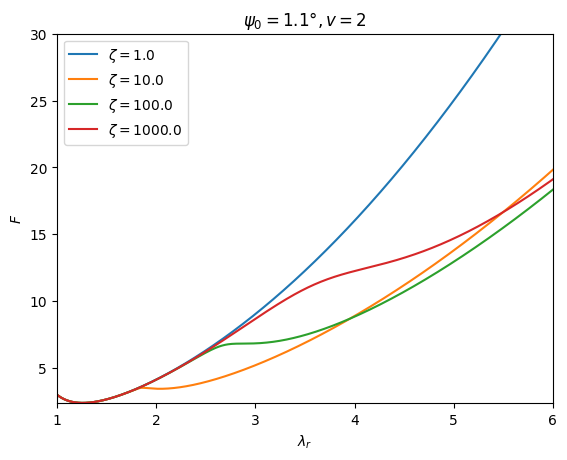

In [15]:
plot_reduced_free_energy_vs_lambda_r_vary_zeta(np.logspace(0, 1, 1000, base=10), 0.02, 2, [ONE, 10, 100, 1000])
plt.xlim(1,6)
plt.ylim(2.35,30)

#plt.xscale('log')
#plt.yscale('log')

plt.show()

## Vary initial twist-angle

In [16]:
def plot_reduced_free_energy_vs_lambda_r_vary_psi_0(lambda_r_array, psi_0_array, v_swell, zeta):
    for psi_0 in psi_0_array:
        plot_reduced_free_energy_vs_lambda_r_constant_twist(lambda_r_array, psi_0, v_swell, zeta, {"label": f"$\\psi_0 = {psi_0 * 180 / np.pi:.01f}\\degree$"})

    plt.legend(loc='best')
    plt.title(f"$\\zeta = {zeta:.01f}, v = {v_swell}$")

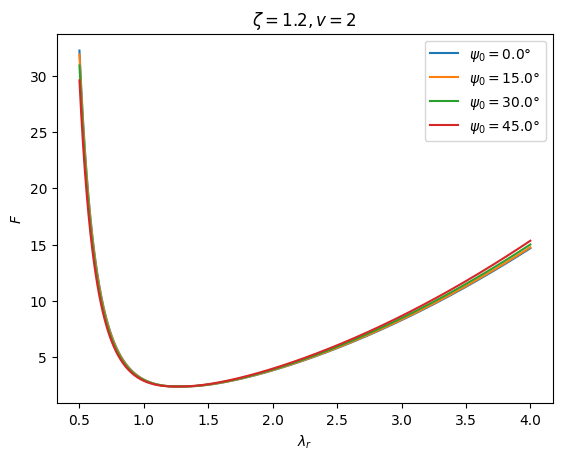

In [17]:
psi_0_wide_to_45 = np.array([1e-6, 15, 30, 45]) * np.pi / 180

plot_reduced_free_energy_vs_lambda_r_vary_psi_0(lambda_r_array_wide, psi_0_wide_to_45, 2, 1.2)

plt.show()

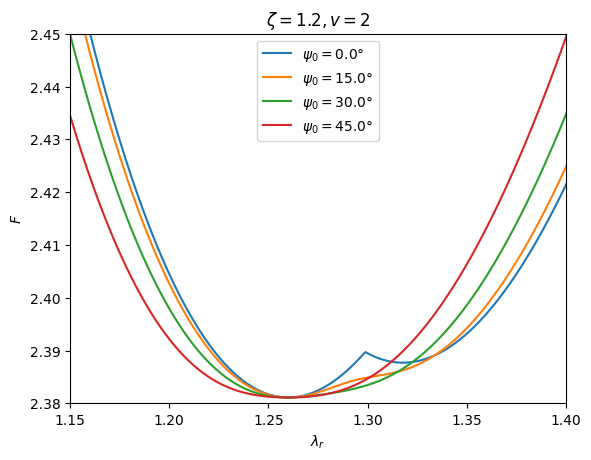

In [18]:
plot_reduced_free_energy_vs_lambda_r_vary_psi_0(lambda_r_array_close, psi_0_wide_to_45, 2, 1.2)

plt.xlim(1.15, 1.4)
plt.ylim(2.38, 2.45)

plt.show()

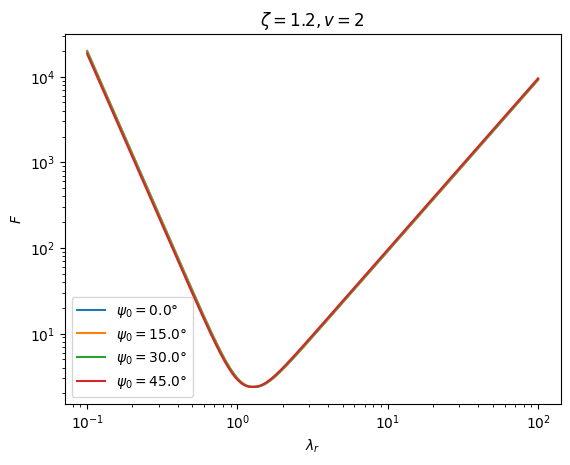

In [19]:
psi_wide_to_90 = np.array([1e-6, 15, 30, 45, 60, 75, 90]) * np.pi / 180

plot_reduced_free_energy_vs_lambda_r_vary_psi_0(np.logspace(-1, 2, 1000, base=10), psi_0_wide_to_45, 2, 1.2)

plt.xscale('log')
plt.yscale('log')

plt.show()

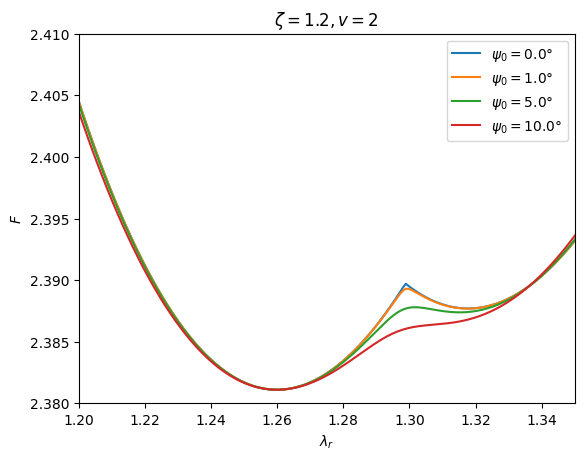

In [20]:
psi_0_near_zero = np.array([1e-6, 1, 5, 10]) * np.pi / 180

plot_reduced_free_energy_vs_lambda_r_vary_psi_0(lambda_r_array_close, psi_0_near_zero, 2, 1.2)

plt.xlim(1.2, 1.35)
plt.ylim(2.38, 2.41)

plt.show()

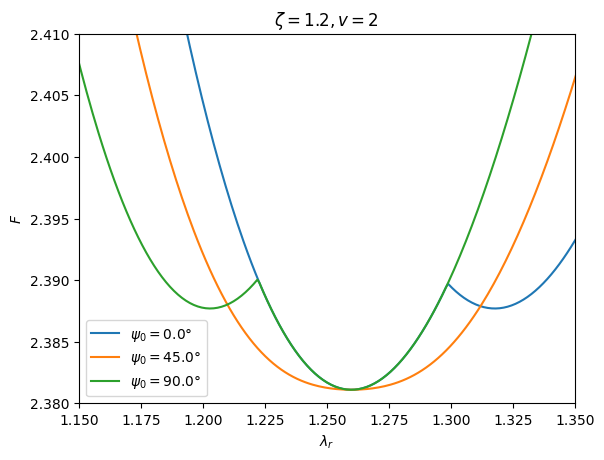

In [21]:
psi_0_wide_45 = np.array([1e-6, 45, 90]) * np.pi / 180

plot_reduced_free_energy_vs_lambda_r_vary_psi_0(lambda_r_array_close, psi_0_wide_45, 2, 1.2)

plt.xlim(1.15, 1.35)
plt.ylim(2.38, 2.41)

plt.show()

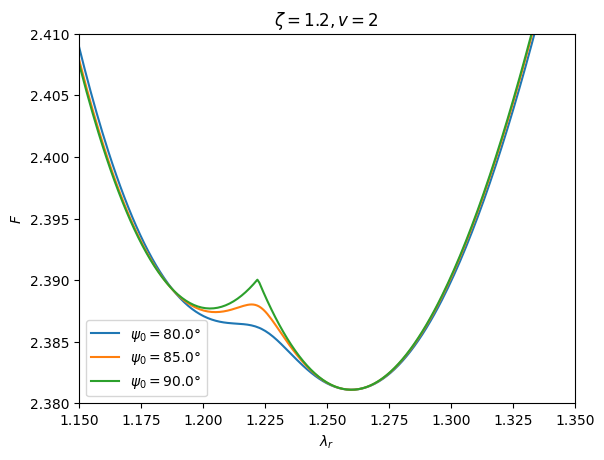

In [22]:
psi_0_near_90 = np.array([80, 85, 90]) * np.pi / 180

plot_reduced_free_energy_vs_lambda_r_vary_psi_0(lambda_r_array_close, psi_0_near_90, 2, 1.2)

plt.xlim(1.15, 1.35)
plt.ylim(2.38, 2.41)

plt.show()

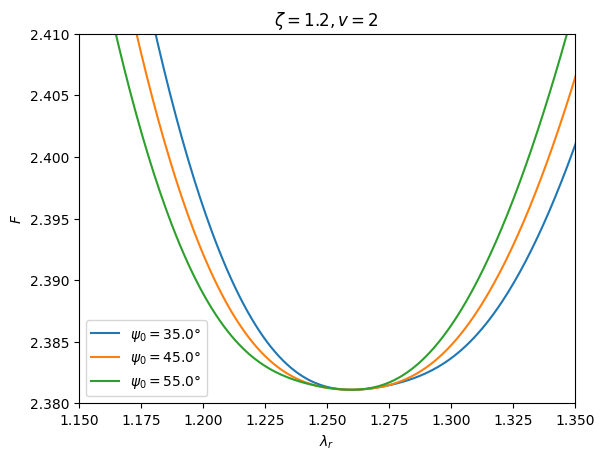

In [23]:
psi_0_near_45 = np.array([35, 45, 55]) * np.pi / 180

plot_reduced_free_energy_vs_lambda_r_vary_psi_0(lambda_r_array_close, psi_0_near_45, 2, 1.2)

plt.xlim(1.15, 1.35)
plt.ylim(2.38, 2.41)

plt.show()

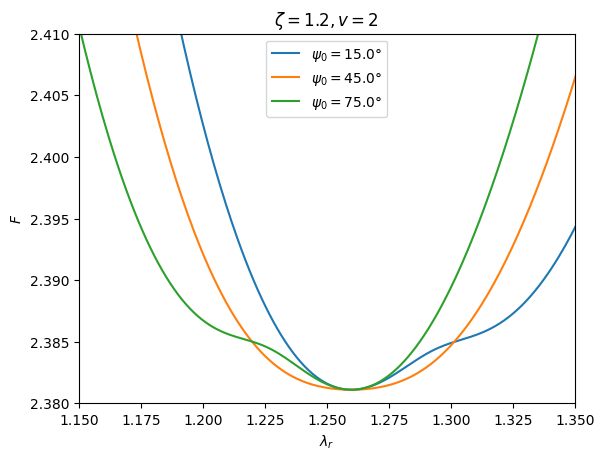

In [24]:
psi_0_around_45 = np.array([15, 45, 75]) * np.pi / 180

plot_reduced_free_energy_vs_lambda_r_vary_psi_0(lambda_r_array_close, psi_0_around_45, 2, 1.2)

plt.xlim(1.15, 1.35)
plt.ylim(2.38, 2.41)

plt.show()

## Vary v

In [25]:
def plot_reduced_free_energy_vs_lambda_r_vary_v_swell(lambda_r_array, psi_0, v_swell_array, zeta):
    for v_swell in v_swell_array:
        plot_reduced_free_energy_vs_lambda_r_constant_twist(lambda_r_array, psi_0, v_swell, zeta, {"label": f"$v = {v_swell}$"})

    plt.legend(loc='best')
    plt.title(f"$\\zeta = {zeta:.01f}, \\psi_0 = {psi_0 * 180/np.pi:.01f}\\degree$")


def plot_reduced_free_energy_vs_swell_anisotropy_vary_v_swell(lambda_r_array, psi_0, v_swell_array, zeta):
    for v_swell in v_swell_array:
        plot_reduced_free_energy_vs_swell_anisotropy_constant_twist(lambda_r_array, psi_0, v_swell, zeta, {"label": f"$v = {v_swell}$"})

    plt.legend(loc='best')
    plt.title(f"$\\zeta = {zeta:.01f}, \\psi_0 = {psi_0 * 180/np.pi:.01f}\\degree$")

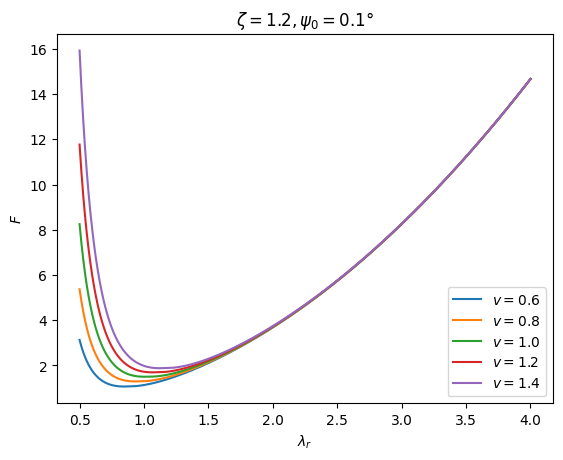

In [26]:
plot_reduced_free_energy_vs_lambda_r_vary_v_swell(lambda_r_array_wide, 0.1 * np.pi / 180, [0.6, 0.8, 1.0, 1.2, 1.4], 1.2)

plt.show()

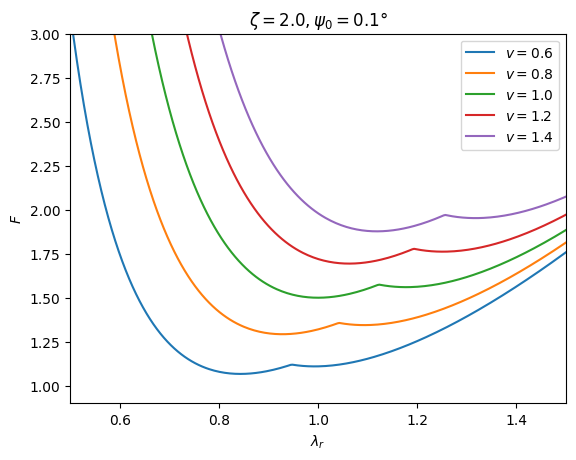

In [27]:
plot_reduced_free_energy_vs_lambda_r_vary_v_swell(lambda_r_array_wide, 0.1 * np.pi / 180, [0.6, 0.8, 1.0, 1.2, 1.4], 2)

plt.xlim(0.5,1.5)
plt.ylim(0.9,3)

plt.show()

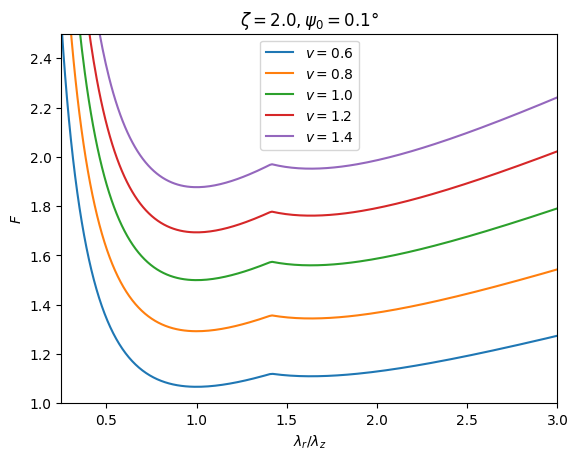

In [28]:
plot_reduced_free_energy_vs_swell_anisotropy_vary_v_swell(lambda_r_array_wide, 0.1 * np.pi / 180, [0.6, 0.8, 1.0, 1.2, 1.4], 2)

plt.xlim(0.25,3)
plt.ylim(1,2.5)

plt.show()

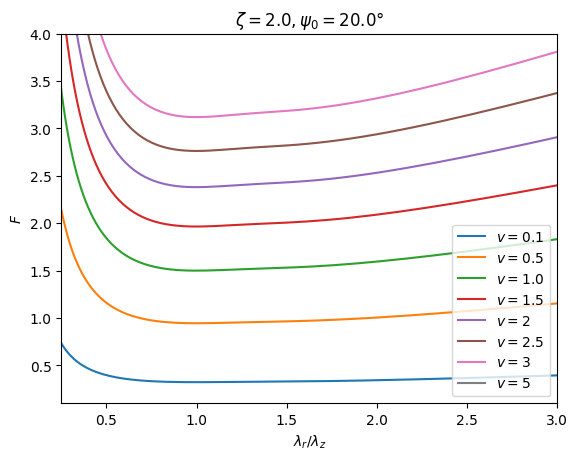

In [144]:
plot_reduced_free_energy_vs_swell_anisotropy_vary_v_swell(lambda_r_array_far, 20 * np.pi / 180, [0.1, 0.5, 1.0, 1.5, 2, 2.5, 3, 5], 2)

plt.xlim(0.25,3)
plt.ylim(0.1,4)

plt.show()

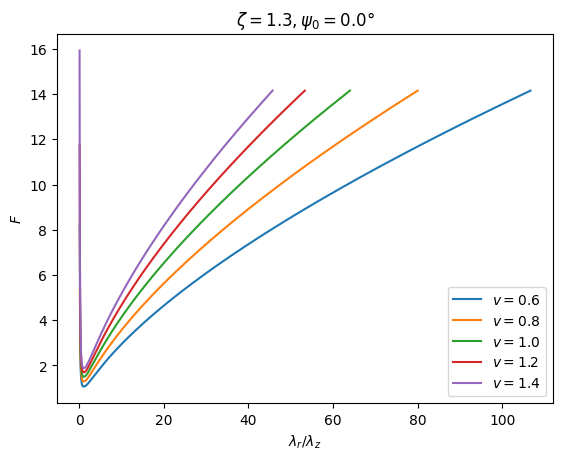

In [52]:
plot_reduced_free_energy_vs_swell_anisotropy_vary_v_swell(lambda_r_array_wide, 0.01 * np.pi / 180, [0.6, 0.8, 1.0, 1.2, 1.4], 1.3)

plt.xlim(0.25,3)
plt.ylim(1,2.5)

plt.show()

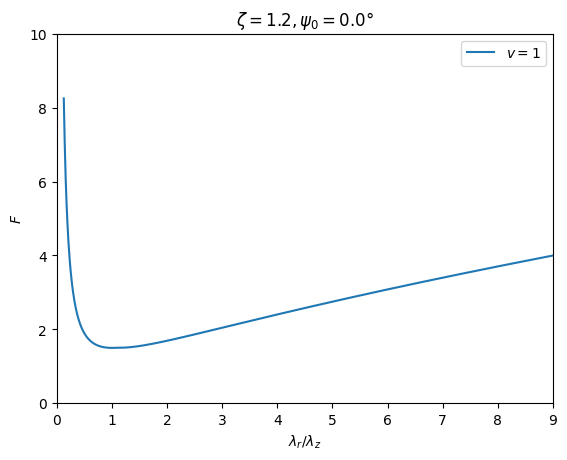

In [62]:
plot_reduced_free_energy_vs_swell_anisotropy_vary_v_swell(lambda_r_array_wide, 0.01 * np.pi / 180, [1], 1.2)

plt.xlim(0,9)
plt.ylim(0,10)

plt.show()

# Plot Equilibrium Deformation Anisotropy

In [78]:
def plot_eqm_deformation_anisotropy_vs_v_swell_constant_twist(lambda_r_array, psi_0, v_swell_array, zeta, plot_kwargs = {}):
    minima_swells = []
    local_minima = []
    maxima_swells = []
    local_maxima = []

    for v_swell in v_swell_array:
        free_energy_array = eqm_finder.calc_reduced_free_energy_density(psi_0, lambda_r_array, v_swell, zeta)

        lambda_z = v_swell / lambda_r_array**2
        deformation_anisotropy = lambda_r_array / lambda_z

        new_local_minima, new_local_maxima = eqm_finder.find_local_optima(free_energy_array)

        for new_local_min in new_local_minima[0]:
            #print(v_swell)
            #print(deformation_anisotropy[new_local_min])
            if new_local_min not in [0, len(deformation_anisotropy) - 1]:
                minima_swells.append(v_swell)
                local_minima.append(deformation_anisotropy[new_local_min])

        for new_local_max in new_local_maxima[0]:
            if new_local_max not in [0, len(deformation_anisotropy) - 1]:
                maxima_swells.append(v_swell)
                local_maxima.append(deformation_anisotropy[new_local_max])


    plt.scatter(minima_swells, local_minima, s=1, **plot_kwargs)
    plt.scatter(maxima_swells, local_maxima, s=1, **plot_kwargs)

    #print(local_minima)
    #print(local_maxima)

    plt.xlabel("$v$")
    plt.ylabel("$\\lambda_r / \\lambda_z$")
    

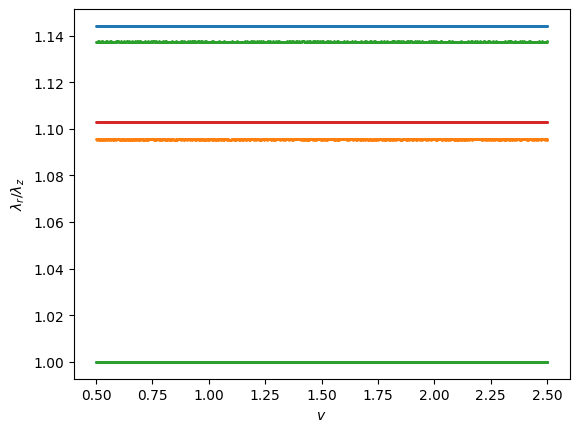

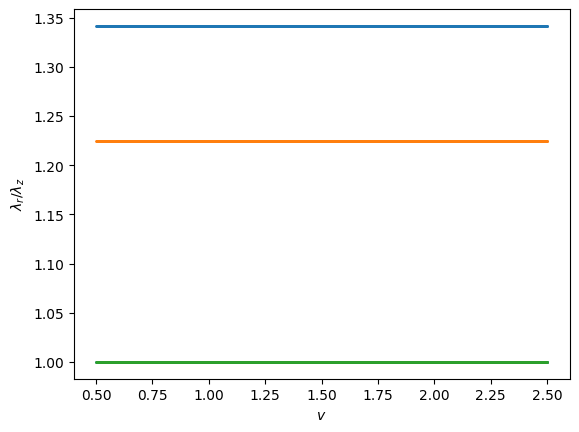

In [143]:
lambda_r_array_super_close = np.linspace(0.5, 1.7, 50000)
good_v_swell_range = np.linspace(0.5, 2.5, 1000)

plot_eqm_deformation_anisotropy_vs_v_swell_constant_twist(lambda_r_array_super_close, 0.01 * np.pi / 180, good_v_swell_range, 1.2)
plot_eqm_deformation_anisotropy_vs_v_swell_constant_twist(lambda_r_array_super_close, 5 * np.pi / 180, good_v_swell_range, 1.2)
plt.show()

plot_eqm_deformation_anisotropy_vs_v_swell_constant_twist(lambda_r_array_super_close, 0.01 * np.pi / 180, good_v_swell_range, 1.5)
plot_eqm_deformation_anisotropy_vs_v_swell_constant_twist(lambda_r_array_super_close, 45 * np.pi / 180, good_v_swell_range, 1.5)
plt.show()

In [112]:
def plot_eqm_deformation_anisotropy_vs_psi_0_constant_twist(lambda_r_array, psi_0_array, v_swell, zeta, plot_kwargs = {}):
    minima_swells = []
    local_minima = []
    maxima_swells = []
    local_maxima = []

    for psi_0 in psi_0_array:
        free_energy_array = eqm_finder.calc_reduced_free_energy_density(psi_0, lambda_r_array, v_swell, zeta)

        lambda_z = v_swell / lambda_r_array**2
        deformation_anisotropy = lambda_r_array / lambda_z

        new_local_minima, new_local_maxima = eqm_finder.find_local_optima(free_energy_array)

        for new_local_min in new_local_minima[0]:
            #print(v_swell)
            #print(deformation_anisotropy[new_local_min])
            if new_local_min not in [0, len(deformation_anisotropy) - 1]:
                minima_swells.append(psi_0)
                local_minima.append(deformation_anisotropy[new_local_min])

        for new_local_max in new_local_maxima[0]:
            if new_local_max not in [0, len(deformation_anisotropy) - 1]:
                maxima_swells.append(psi_0)
                local_maxima.append(deformation_anisotropy[new_local_max])


    plt.scatter(np.array(minima_swells) * 180/np.pi, local_minima, s=1, **plot_kwargs)
    plt.scatter(np.array(maxima_swells) * 180/np.pi, local_maxima, s=1, **plot_kwargs)

    #print(local_minima)
    #print(local_maxima)

    plt.xlabel("$\\psi_0 (\\degree)$")
    plt.ylabel("$\\lambda_r / \\lambda_z$")
    

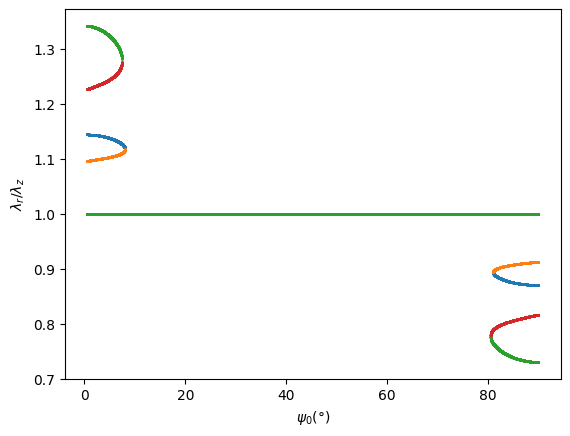

In [140]:
lambda_r_array_super_close = np.linspace(0.5, 1.7, 10000)
good_psi_0_range = np.linspace(0.01, np.pi / 2, 10000)

plot_eqm_deformation_anisotropy_vs_psi_0_constant_twist(lambda_r_array_super_close, good_psi_0_range, 2, 1.2)
plot_eqm_deformation_anisotropy_vs_psi_0_constant_twist(lambda_r_array_super_close, good_psi_0_range, 2, 1.5)

In [128]:
def plot_eqm_deformation_anisotropy_vs_zeta_constant_twist(lambda_r_array, psi_0, v_swell, zeta_array, plot_kwargs = {}):
    minima_swells = []
    local_minima = []
    maxima_swells = []
    local_maxima = []

    for zeta in zeta_array:
        free_energy_array = eqm_finder.calc_reduced_free_energy_density(psi_0, lambda_r_array, v_swell, zeta)

        lambda_z = v_swell / lambda_r_array**2
        deformation_anisotropy = lambda_r_array / lambda_z

        new_local_minima, new_local_maxima = eqm_finder.find_local_optima(free_energy_array)

        for new_local_min in new_local_minima[0]:
            #print(v_swell)
            #print(deformation_anisotropy[new_local_min])
            if new_local_min not in [0, len(deformation_anisotropy) - 1]:
                minima_swells.append(zeta)
                local_minima.append(deformation_anisotropy[new_local_min])

        for new_local_max in new_local_maxima[0]:
            if new_local_max not in [0, len(deformation_anisotropy) - 1]:
                maxima_swells.append(zeta)
                local_maxima.append(deformation_anisotropy[new_local_max])


    plt.scatter(minima_swells, local_minima, s=1, **plot_kwargs)
    plt.scatter(maxima_swells, local_maxima, s=1, **plot_kwargs)

    #print(local_minima)
    #print(local_maxima)

    plt.xlabel("$\\zeta$")
    plt.ylabel("$\\lambda_r / \\lambda_z$")
    

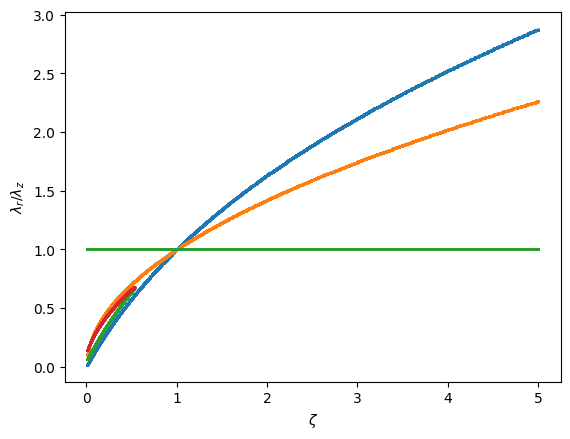

In [142]:
lambda_r_array_super_close = np.linspace(0.01, 10, 10000)
good_zeta_range = np.linspace(0.01, 5, 10000)

plot_eqm_deformation_anisotropy_vs_zeta_constant_twist(lambda_r_array_super_close, 1 * np.pi / 180, 1, good_zeta_range)
#plot_eqm_deformation_anisotropy_vs_zeta_constant_twist(lambda_r_array_super_close, 5 * np.pi / 180, 2, good_zeta_range)
plot_eqm_deformation_anisotropy_vs_zeta_constant_twist(lambda_r_array_super_close, 10 * np.pi / 180, 2, good_zeta_range)

In [123]:
def plot_eqm_deformation_anisotropy_3d_constant_twist(lambda_r_array, psi_0_array, v_swell, zeta_array, plot_kwargs = {}):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    
    minima_psi_0s = []
    minima_zetas = []
    local_minima = []
    maxima_psi_0s = []
    maxima_zetas = []
    local_maxima = []

    for psi_0 in psi_0_array:
        for zeta in zeta_array:
            free_energy_array = eqm_finder.calc_reduced_free_energy_density(psi_0, lambda_r_array, v_swell, zeta)

            lambda_z = v_swell / lambda_r_array**2
            deformation_anisotropy = lambda_r_array / lambda_z

            new_local_minima, new_local_maxima = eqm_finder.find_local_optima(free_energy_array)

            for new_local_min in new_local_minima[0]:
                #print(v_swell)
                #print(deformation_anisotropy[new_local_min])
                if new_local_min not in [0, len(deformation_anisotropy) - 1]:
                    minima_psi_0s.append(psi_0)
                    minima_zetas.append(zeta)
                    local_minima.append(deformation_anisotropy[new_local_min])

            for new_local_max in new_local_maxima[0]:
                if new_local_max not in [0, len(deformation_anisotropy) - 1]:
                    maxima_psi_0s.append(psi_0)
                    maxima_zetas.append(zeta)
                    local_maxima.append(deformation_anisotropy[new_local_max])


    ax.scatter(minima_psi_0s, minima_zetas, local_minima, s=1, **plot_kwargs)
    ax.scatter(maxima_psi_0s, maxima_zetas, local_maxima, s=1, **plot_kwargs)

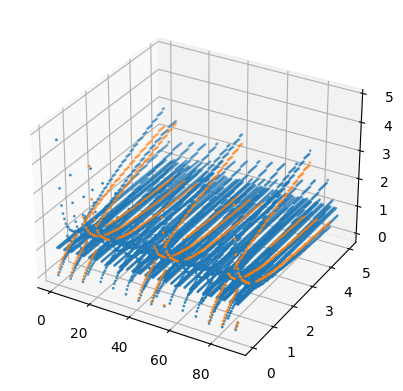

In [126]:
ZERO = 1e-9

lambda_r_array_super_close = np.linspace(0.2, 1.7, 100)
good_zeta_range = np.linspace(0.01, 5, 100)
good_psi_0_range = np.linspace(ZERO, 90 - ZERO, 100)

plot_eqm_deformation_anisotropy_3d_constant_twist(lambda_r_array_super_close, good_psi_0_range, v_swell, good_zeta_range)

# linear twist

In [8]:
def plot_reduced_free_energy_vs_swell_anisotropy_linear_twist(lambda_r_array, psi_0_surf, v_swell, zeta, plot_kwargs):
    """Plots reduced free energy against swell anisotropy = lambda_r/lambda_z for some given range of lambda_r values."""

    free_energy_array = []
    for lambda_r in lambda_r_array:
        free_energy_array.append(eqm_finder.calc_reduced_free_energy_linear_twist_angle(psi_0_surf, lambda_r, v_swell, zeta))

    lambda_z_array = v_swell / lambda_r_array**2

    plt.plot(lambda_r_array / lambda_z_array, free_energy_array, **plot_kwargs)
    plt.xlabel("$\\lambda_r / \\lambda_z$")
    plt.ylabel("$F$")


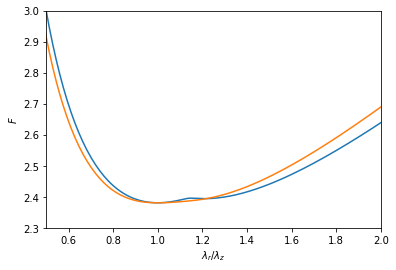

In [18]:
lambda_r_array = np.linspace(0.01, 5, 1000)

plot_reduced_free_energy_vs_swell_anisotropy_linear_twist(lambda_r_array, 5 * np.pi/180, 2, 1.3, {"label": "5"})
plot_reduced_free_energy_vs_swell_anisotropy_linear_twist(lambda_r_array, 45 * np.pi/180, 2, 1.3, {"label": "45"})

plt.xlim(0.5, 2)
plt.ylim(2.3, 3)

plt.show()

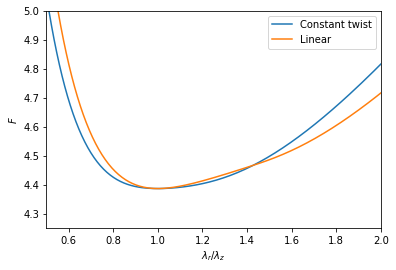

In [36]:
lambda_r_array = np.linspace(0.01, 5, 1000)

plot_reduced_free_energy_vs_swell_anisotropy_constant_twist(lambda_r_array, 40 * np.pi/180, 5, 2, {"label": "Constant twist"})
plot_reduced_free_energy_vs_swell_anisotropy_linear_twist(lambda_r_array, 40 * np.pi/180, 5, 2, {"label": "Linear"})

plt.xlim(0.5, 2)
plt.ylim(4.25, 5)

plt.legend(loc='best')

plt.show()